In [74]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
sns.set()
plt.rcParams['image.cmap'] = 'viridis'


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

# Data Loading and Exploration

In [31]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Loan_Train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
data.shape

(614, 13)

In [33]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [34]:
data.drop('Loan_ID',axis=1,inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [36]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [38]:
num_cols = [x for x in data.select_dtypes(include=np.number)]
cat_cols = [x for x in data.select_dtypes(exclude=np.number)]

In [39]:
print("There are", len(num_cols), "numerical columns and", len(cat_cols), "categorical columns in the dataset\n")
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

There are 5 numerical columns and 7 categorical columns in the dataset

Numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


# Exploratory Data Analysis

## Numerical features


<Axes: >

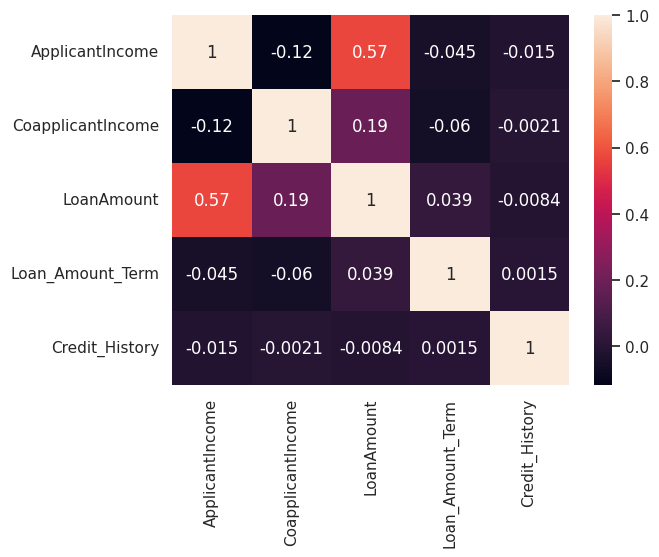

In [40]:
# Heatmap showing correlation in between features
corr = data.corr()
sns.heatmap(corr,annot=True)

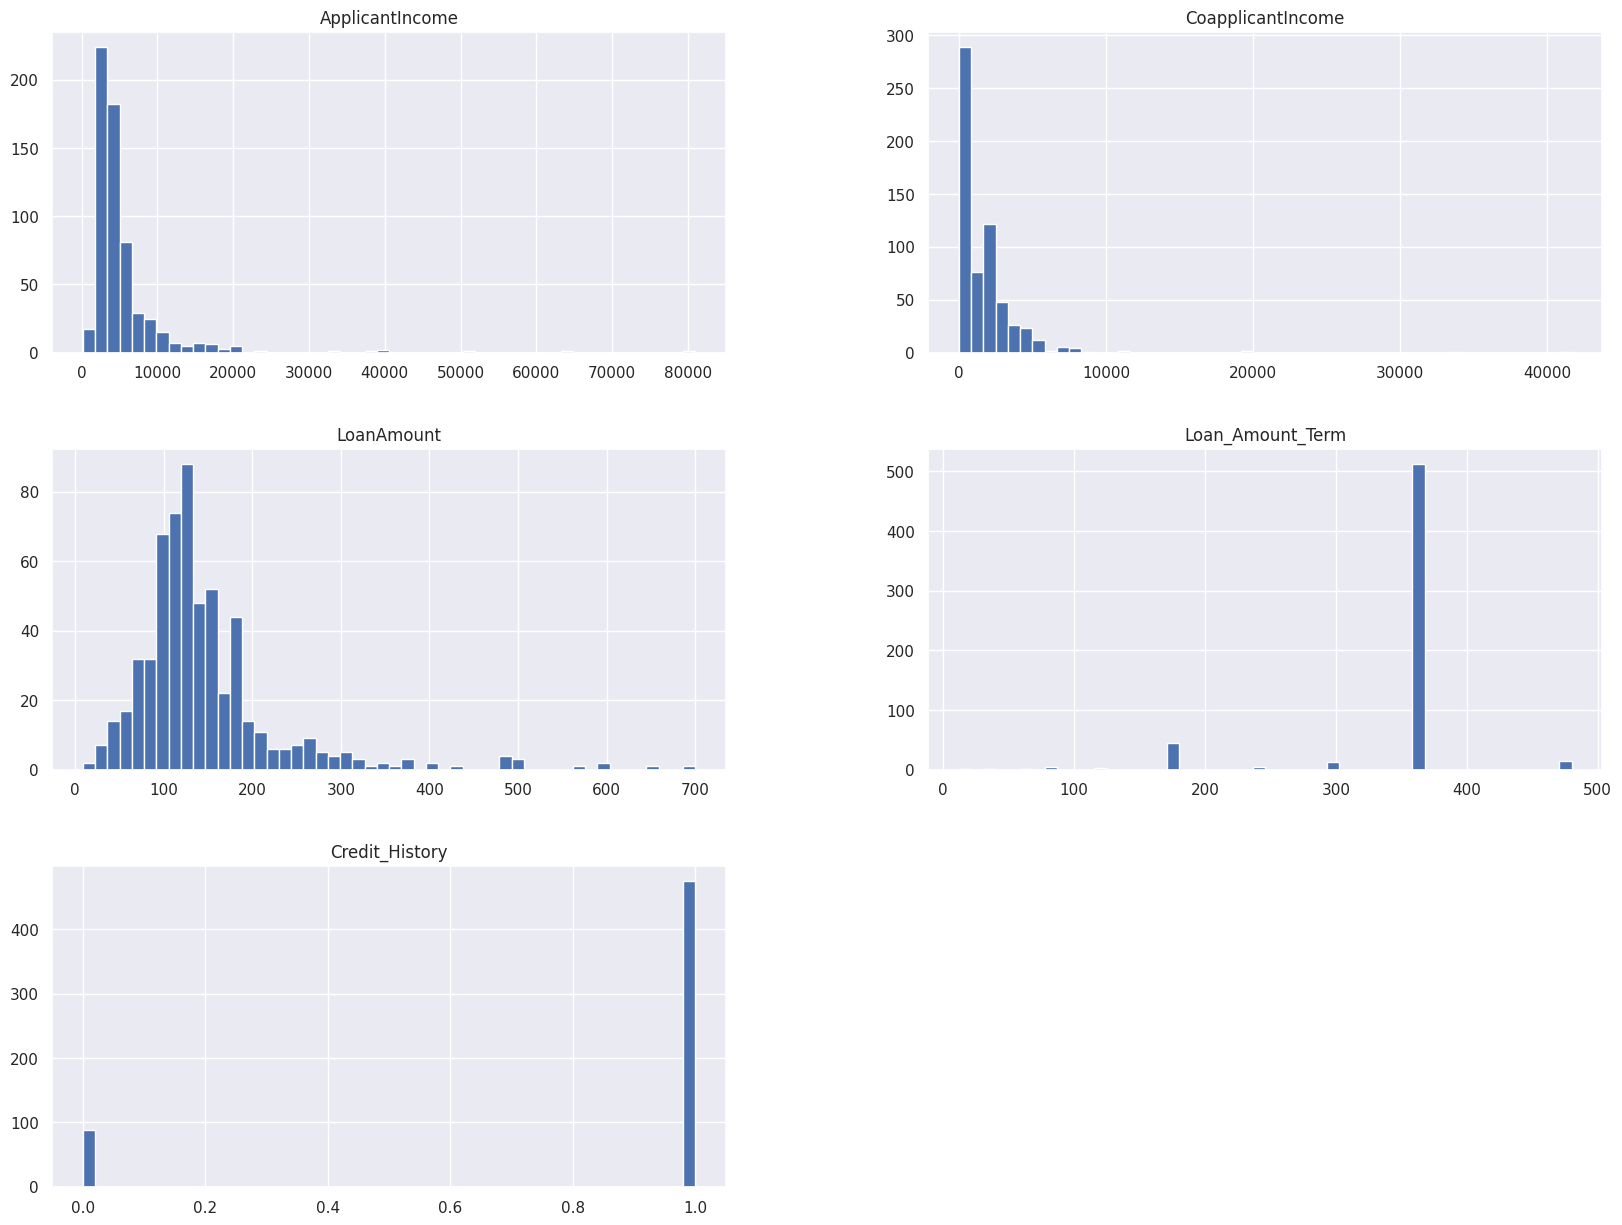

In [41]:
# Histogram for all features
data.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

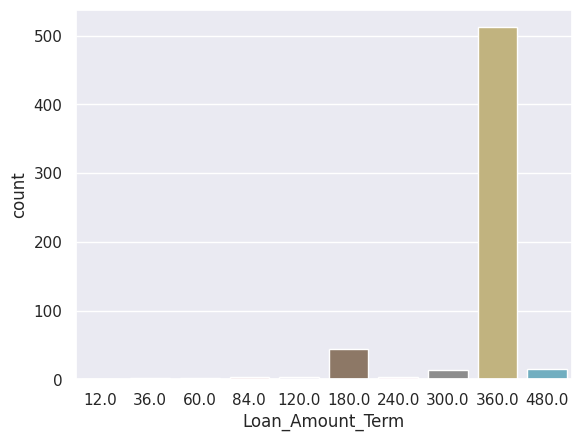

In [42]:
# Countplot for Loan_Amount_Term feature
sns.countplot(x='Loan_Amount_Term', data=data)

<Axes: xlabel='Credit_History', ylabel='count'>

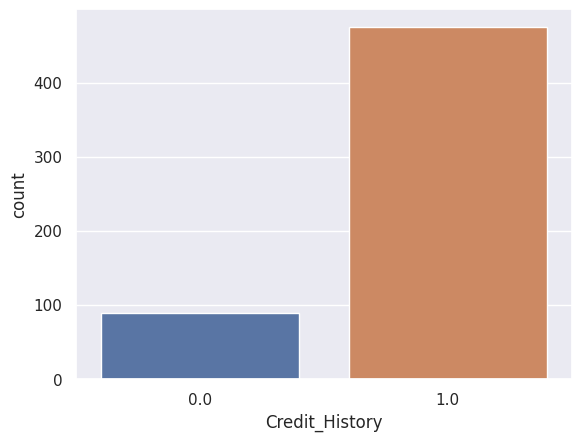

In [43]:
# Countplot for Credit_History feature
sns.countplot(x='Credit_History', data=data)

## Categorical features

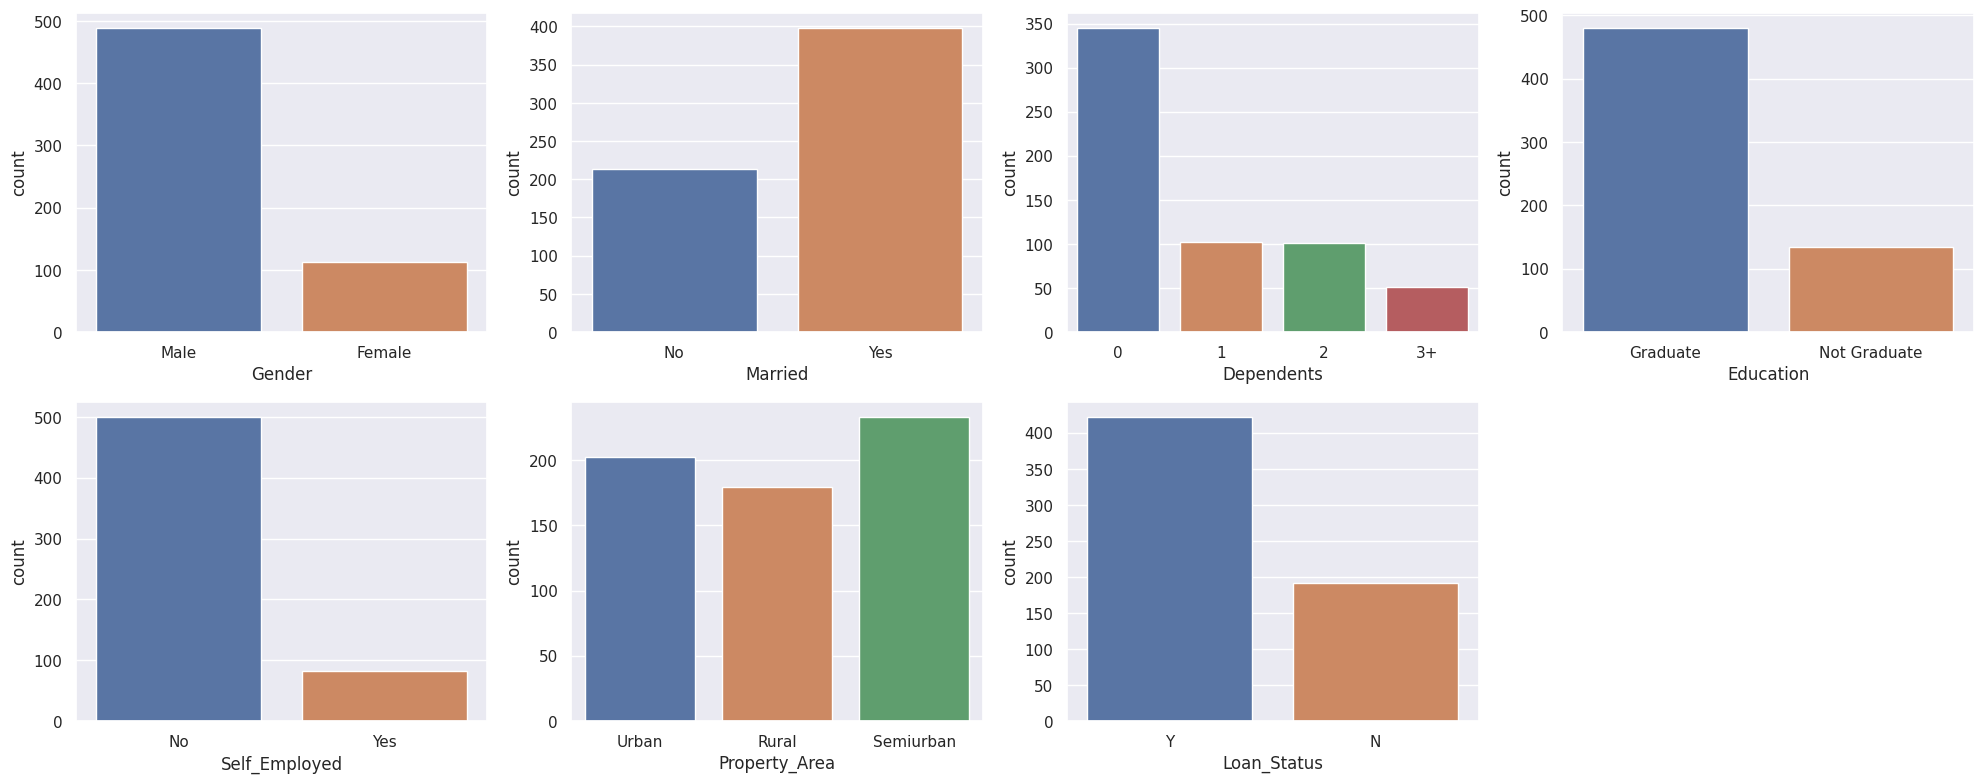

In [44]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,8))
axs = axs.flatten()

for i, var in enumerate(cat_cols):
    sns.countplot(x=var, data=data, ax=axs[i])

fig.delaxes(axs[7])
fig.tight_layout()
plt.show()

# Data preprocessing

In [45]:
#Convert some object data type to int64
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}

data['Gender'] = data['Gender'].replace(gender_stat)
data['Married'] = data['Married'].replace(yes_no_stat)
data['Dependents'] = data['Dependents'].replace(dependents_stat)
data['Education'] = data['Education'].replace(education_stat)
data['Self_Employed'] = data['Self_Employed'].replace(yes_no_stat)
data['Property_Area'] = data['Property_Area'].replace(property_stat)

In [46]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,Y
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,N
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,Y
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,Y
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,Y


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    float64
 1   Married            611 non-null    float64
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 57.7+ KB


In [48]:
# Handling missing values
data['Gender'].fillna(data['Gender'].value_counts().idxmax(), inplace=True)
data['Married'].fillna(data['Married'].value_counts().idxmax(), inplace=True)
data['Dependents'].fillna(data['Dependents'].value_counts().idxmax(), inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].value_counts().idxmax(), inplace=True)
data["LoanAmount"].fillna(data["LoanAmount"].mean(skipna=True), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].value_counts().idxmax(), inplace=True)

In [49]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

# Model Building

## Logistic Regression

In [53]:
# Logistic Regression Classifier
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_predictions = lr_clf.predict(X_test)

In [54]:
lr_predictions

array(['N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

In [55]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           N       0.72      0.33      0.46        39
           Y       0.75      0.94      0.84        84

    accuracy                           0.75       123
   macro avg       0.74      0.64      0.65       123
weighted avg       0.74      0.75      0.72       123



In [56]:
cm=confusion_matrix(y_test,lr_predictions)
cm

array([[13, 26],
       [ 5, 79]])

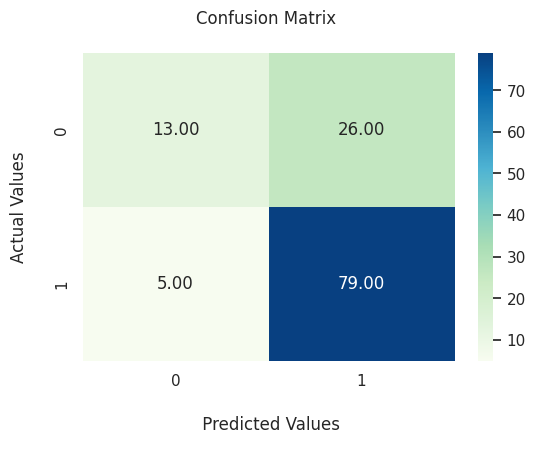

In [57]:
# Plotting confusion matrix
plt.figure(figsize=(6,4))
fx=sns.heatmap(confusion_matrix(y_test,lr_predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In [58]:
lr=accuracy_score(y_test, lr_predictions)
lr

0.7479674796747967

## Decision Tree

In [59]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)

In [60]:
dt_predictions

array(['N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

In [61]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           N       0.53      0.51      0.52        39
           Y       0.78      0.79      0.78        84

    accuracy                           0.70       123
   macro avg       0.65      0.65      0.65       123
weighted avg       0.70      0.70      0.70       123



In [62]:
cm=confusion_matrix(y_test,dt_predictions)
cm

array([[20, 19],
       [18, 66]])

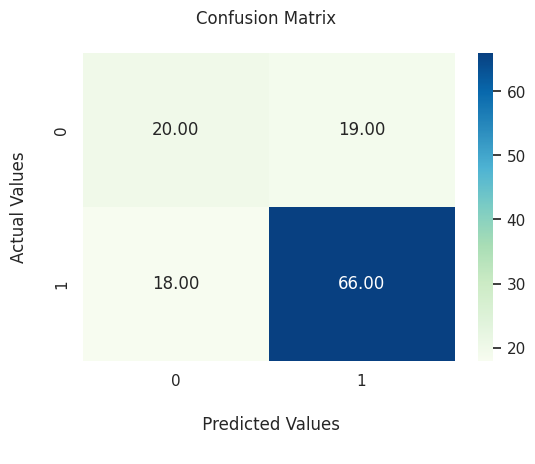

In [63]:
# Plotting confusion matrix
plt.figure(figsize=(6,4))
fx=sns.heatmap(confusion_matrix(y_test,dt_predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In [64]:
dt=accuracy_score(y_test, dt_predictions)
dt

0.6991869918699187

## Random Forest

In [65]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)

In [66]:
rf_predictions

array(['N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

In [67]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           N       0.71      0.38      0.50        39
           Y       0.76      0.93      0.84        84

    accuracy                           0.76       123
   macro avg       0.74      0.66      0.67       123
weighted avg       0.75      0.76      0.73       123



In [68]:
cm=confusion_matrix(y_test,rf_predictions)
cm

array([[15, 24],
       [ 6, 78]])

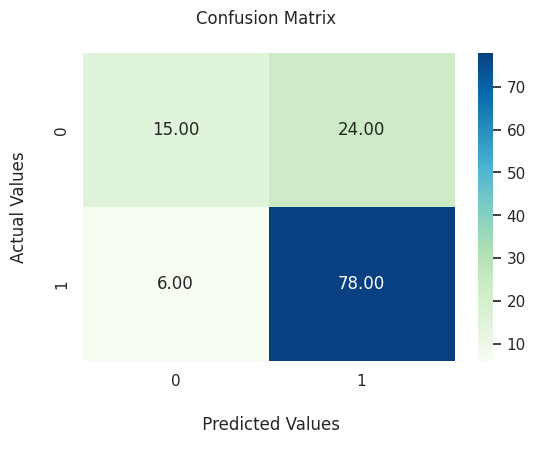

In [69]:
# Plotting confusion matrix
plt.figure(figsize=(6,4))
fx=sns.heatmap(confusion_matrix(y_test,rf_predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In [70]:
rf=accuracy_score(y_test, rf_predictions)
rf

0.7560975609756098

## KNeighbors classifier

In [75]:
# kNeighbors Classifier
kn_clf =  KNeighborsClassifier()
kn_clf.fit(X_train, y_train)
kn_predictions = kn_clf.predict(X_test)

In [76]:
kn_predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N'], dtype=object)

In [77]:
print(classification_report(y_test, kn_predictions))

              precision    recall  f1-score   support

           N       0.33      0.21      0.25        39
           Y       0.69      0.81      0.74        84

    accuracy                           0.62       123
   macro avg       0.51      0.51      0.50       123
weighted avg       0.57      0.62      0.59       123



In [78]:
cm=confusion_matrix(y_test,kn_predictions)
cm

array([[ 8, 31],
       [16, 68]])

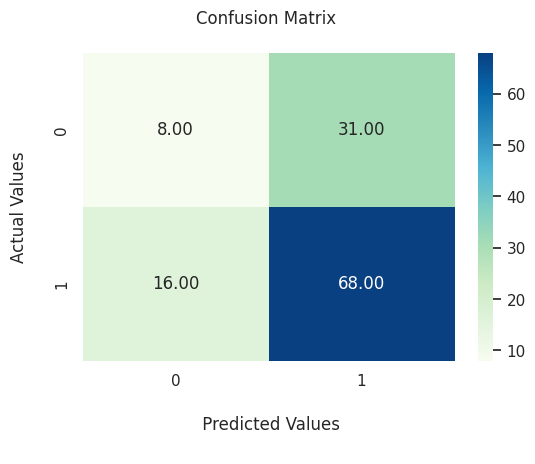

In [79]:
# Plotting confusion matrix
plt.figure(figsize=(6,4))
fx=sns.heatmap(confusion_matrix(y_test,kn_predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In [80]:
kn=accuracy_score(y_test, kn_predictions)
kn

0.6178861788617886

# Models Comaprison

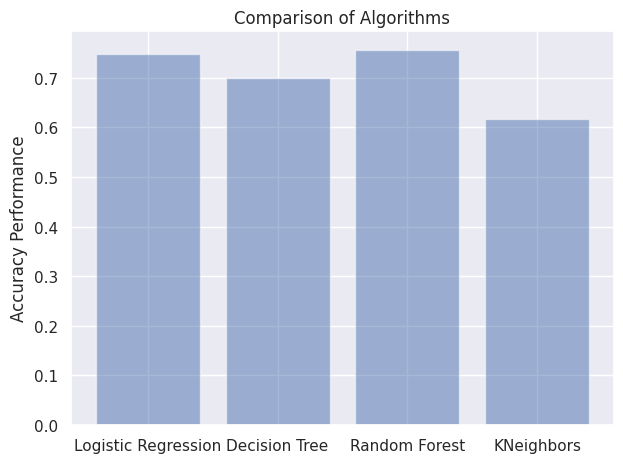

In [81]:
#Accuracy model comparison
algorithms = ['Logistic Regression', 'Decision Tree','Random Forest', 'KNeighbors']
acc = [lr,dt,rf,kn]

fig, ax = plt.subplots()
ax.bar(algorithms, acc, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy Performance')
ax.set_xticks(algorithms)
ax.set_title('Comparison of Algorithms')
plt.tight_layout()
plt.show()